<a href="https://colab.research.google.com/github/maleiyahdavis/Phase-2-/blob/main/mpg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First I did everything in pandas because I was a bit confused and wanted to at least start getting an idea of what the results of my queries would look like. So disregard this part. I did pyspark a little further down. 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns


In [ ]:
df = sns.load_dataset("mpg")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


1.

In [ ]:
highest = df["mpg"].max()
highest

46.6

In [ ]:
lowest = df['mpg'].min()
lowest 

9.0

In [ ]:
model_year_max = df.groupby("model_year").agg({"mpg": ["min", "max"]})
model_year_max

mpg      
             min   max
model_year            
70           9.0  27.0
71          12.0  35.0
72          11.0  28.0
73          11.0  29.0
74          13.0  32.0
75          13.0  33.0
76          13.0  33.0
77          15.0  36.0
78          16.2  43.1
79          15.5  37.3
80          19.1  46.6
81          17.6  39.1
82          22.0  44.0

In [ ]:
country_avg = df.groupby(by ="origin")["mpg"].mean()
country_avg

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

In [ ]:
count_cylinders = df.groupby(by="cylinders")["mpg"].mean()
count_cylinders

cylinders
3    20.550000
4    29.286765
5    27.366667
6    19.985714
8    14.963107
Name: mpg, dtype: float64

In [ ]:
country_release_avg = df.groupby(["origin", "model_year"])["mpg"].mean()
country_release_avg

origin  model_year
europe  70            25.200000
        71            28.750000
        72            22.000000
        73            24.000000
        74            27.000000
        75            24.500000
        76            24.250000
        77            29.250000
        78            24.950000
        79            30.450000
        80            37.288889
        81            31.575000
        82            40.000000
japan   70            25.500000
        71            29.500000
        72            24.200000
        73            20.000000
        74            29.333333
        75            27.500000
        76            28.000000
        77            27.416667
        78            29.687500
        79            32.950000
        80            35.400000
        81            32.958333
        82            34.888889
usa     70            15.272727
        71            18.100000
        72            16.277778
        73            15.034483
        74           

Here are the actual pyspark version of my answers


In [ ]:
!pip install -q pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import pyspark

In [ ]:
spark = pyspark.sql.SparkSession.builder.getOrCreate()

In [ ]:
mpg = sns.load_dataset("mpg")
df2 = spark.createDataFrame(mpg)
df2.show()

+----+---------+------------+----------+------+------------+----------+------+--------------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model_year|origin|                name|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
|18.0|        8|       307.0|     130.0|  3504|        12.0|        70|   usa|chevrolet chevell...|
|15.0|        8|       350.0|     165.0|  3693|        11.5|        70|   usa|   buick skylark 320|
|18.0|        8|       318.0|     150.0|  3436|        11.0|        70|   usa|  plymouth satellite|
|16.0|        8|       304.0|     150.0|  3433|        12.0|        70|   usa|       amc rebel sst|
|17.0|        8|       302.0|     140.0|  3449|        10.5|        70|   usa|         ford torino|
|15.0|        8|       429.0|     198.0|  4341|        10.0|        70|   usa|    ford galaxie 500|
|14.0|        8|       454.0|     220.0|  4354|         9.0|        70|   usa|    chevrolet impala|


1. Find the cars with the highest and lowest mpg

In [ ]:
df2.groupBy("name").max("mpg").show()

+--------------------+--------+
|                name|max(mpg)|
+--------------------+--------+
|         audi 100 ls|    24.0|
|    chevrolet malibu|    20.5|
|chevrolet monte c...|    15.0|
|         volvo 244dl|    22.0|
|buick estate wago...|    16.9|
|         amc matador|    18.0|
|ford gran torino ...|    14.0|
|plymouth satellit...|    16.0|
|           fiat 124b|    30.0|
|toyota corona har...|    24.0|
|            bmw 2002|    26.0|
|            hi 1200d|     9.0|
|          datsun 710|    32.0|
|oldsmobile vista ...|    12.0|
|          opel manta|    26.0|
|    amc matador (sw)|    15.0|
|        renault 12tl|    27.0|
|          audi 100ls|    23.0|
| chevrolet vega 2300|    28.0|
|plymouth fury gra...|    14.0|
+--------------------+--------+
only showing top 20 rows



In [ ]:
df2.groupBy("name").min("mpg").show()

+--------------------+--------+
|                name|min(mpg)|
+--------------------+--------+
|         audi 100 ls|    24.0|
|    chevrolet malibu|    13.0|
|chevrolet monte c...|    15.0|
|         volvo 244dl|    22.0|
|buick estate wago...|    14.0|
|         amc matador|    14.0|
|ford gran torino ...|    13.0|
|plymouth satellit...|    16.0|
|           fiat 124b|    30.0|
|toyota corona har...|    24.0|
|            bmw 2002|    26.0|
|            hi 1200d|     9.0|
|          datsun 710|    24.0|
|oldsmobile vista ...|    12.0|
|          opel manta|    24.0|
|    amc matador (sw)|    14.0|
|        renault 12tl|    27.0|
|          audi 100ls|    20.0|
| chevrolet vega 2300|    28.0|
|plymouth fury gra...|    14.0|
+--------------------+--------+
only showing top 20 rows



2. Find the cars with the highest and lowest mpg in their release 
decade

In [ ]:
df2.filter("model_year < 80") \
  .groupBy("model_year", "name") \
  .max("mpg") \
  .orderBy("model_year") \
  .show()


+----------+--------------------+--------+
|model_year|                name|max(mpg)|
+----------+--------------------+--------+
|        70|           chevy c20|    10.0|
|        70|  plymouth satellite|    18.0|
|        70|         audi 100 ls|    24.0|
|        70|       amc rebel sst|    16.0|
|        70|          dodge d200|    11.0|
|        70|volkswagen 1131 d...|    26.0|
|        70|buick estate wago...|    14.0|
|        70|         peugeot 504|    25.0|
|        70|         amc gremlin|    21.0|
|        70|chevrolet chevell...|    18.0|
|        70|        datsun pl510|    27.0|
|        70| dodge challenger se|    15.0|
|        70|            hi 1200d|     9.0|
|        70|   plymouth fury iii|    14.0|
|        70|         ford torino|    17.0|
|        70|   buick skylark 320|    15.0|
|        70|    ford galaxie 500|    15.0|
|        70|          amc hornet|    18.0|
|        70|            saab 99e|    25.0|
|        70|            bmw 2002|    26.0|
+----------

In [ ]:
df2.filter("model_year > 79") \
  .groupBy("model_year", "name") \
  .max("mpg") \
  .orderBy("model_year") \
  .show()


+----------+--------------------+--------+
|model_year|                name|max(mpg)|
+----------+--------------------+--------+
|        80|  chevrolet citation|    28.0|
|        80|  ford mustang cobra|    23.6|
|        80|       datsun 280-zx|    32.7|
|        80|        honda accord|    32.4|
|        80|toyota corolla te...|    38.1|
|        80|toyota corona lif...|    29.8|
|        80|  vw dasher (diesel)|    43.4|
|        80|         dodge aspen|    19.1|
|        80|  mercedes-benz 240d|    30.0|
|        80|           audi 4000|    34.3|
|        80|vw rabbit c (diesel)|    44.3|
|        80| audi 5000s (diesel)|    36.4|
|        80|       mazda rx-7 gs|    23.7|
|        80|         amc concord|    24.3|
|        80|          datsun 210|    40.8|
|        80|    vokswagen rabbit|    29.8|
|        80|           mazda 626|    31.3|
|        80|           vw rabbit|    41.5|
|        80| honda civic 1500 gl|    44.6|
|        80|       ford fairmont|    26.4|
+----------

In [ ]:
df2.filter("model_year < 80") \
  .groupBy("model_year", "name") \
  .min("mpg") \
  .orderBy("model_year") \
  .show()


+----------+--------------------+--------+
|model_year|                name|min(mpg)|
+----------+--------------------+--------+
|        70|           chevy c20|    10.0|
|        70|  plymouth satellite|    18.0|
|        70|         audi 100 ls|    24.0|
|        70|       amc rebel sst|    16.0|
|        70|          dodge d200|    11.0|
|        70|volkswagen 1131 d...|    26.0|
|        70|buick estate wago...|    14.0|
|        70|         peugeot 504|    25.0|
|        70|         amc gremlin|    21.0|
|        70|chevrolet chevell...|    18.0|
|        70|        datsun pl510|    27.0|
|        70| dodge challenger se|    15.0|
|        70|            hi 1200d|     9.0|
|        70|   plymouth fury iii|    14.0|
|        70|         ford torino|    17.0|
|        70|   buick skylark 320|    15.0|
|        70|    ford galaxie 500|    15.0|
|        70|          amc hornet|    18.0|
|        70|            saab 99e|    25.0|
|        70|            bmw 2002|    26.0|
+----------

In [ ]:
df2.filter("model_year > 79") \
  .groupBy("model_year", "name") \
  .max("mpg") \
  .orderBy("model_year") \
  .show()


+----------+--------------------+--------+
|model_year|                name|max(mpg)|
+----------+--------------------+--------+
|        80|  chevrolet citation|    28.0|
|        80|  ford mustang cobra|    23.6|
|        80|       datsun 280-zx|    32.7|
|        80|        honda accord|    32.4|
|        80|toyota corolla te...|    38.1|
|        80|toyota corona lif...|    29.8|
|        80|  vw dasher (diesel)|    43.4|
|        80|         dodge aspen|    19.1|
|        80|  mercedes-benz 240d|    30.0|
|        80|           audi 4000|    34.3|
|        80|vw rabbit c (diesel)|    44.3|
|        80| audi 5000s (diesel)|    36.4|
|        80|       mazda rx-7 gs|    23.7|
|        80|         amc concord|    24.3|
|        80|          datsun 210|    40.8|
|        80|    vokswagen rabbit|    29.8|
|        80|           mazda 626|    31.3|
|        80|           vw rabbit|    41.5|
|        80| honda civic 1500 gl|    44.6|
|        80|       ford fairmont|    26.4|
+----------

3. Find the average weight per country of origin

In [ ]:
df2.groupBy("origin").mean("weight").show()

+------+------------------+
|origin|       avg(weight)|
+------+------------------+
| japan| 2221.227848101266|
|europe|            2423.3|
|   usa|3361.9317269076305|
+------+------------------+



4. Find the average mpg per cylinder count

In [ ]:
df2.groupBy("cylinders").mean("mpg").show()

+---------+------------------+
|cylinders|          avg(mpg)|
+---------+------------------+
|        6|19.985714285714288|
|        3|             20.55|
|        8|14.963106796116502|
|        4| 29.28676470588235|
|        5|27.366666666666664|
+---------+------------------+



5. Find the average mpg per country of origin and release year

In [ ]:
df2.groupBy("origin", "model_year") \
  .mean("mpg") \
  .show()

+------+----------+------------------+
|origin|model_year|          avg(mpg)|
+------+----------+------------------+
| japan|        75|              27.5|
|europe|        71|             28.75|
|   usa|        73| 15.03448275862069|
| japan|        72|              24.2|
|europe|        76|             24.25|
| japan|        73|              20.0|
|europe|        72|              22.0|
|   usa|        74|18.333333333333332|
|europe|        74|              27.0|
|   usa|        76|19.431818181818183|
|europe|        70|              25.2|
|   usa|        75|             17.55|
| japan|        71|              29.5|
|   usa|        70|15.272727272727273|
| japan|        76|              28.0|
|europe|        75|              24.5|
| japan|        70|              25.5|
| japan|        74|29.333333333333332|
|   usa|        71|              18.1|
|europe|        73|              24.0|
+------+----------+------------------+
only showing top 20 rows



In [ ]:
import matplotlib.pyplot as plt


In [ ]:
pandasdf = df2.toPandas()
pandasdf

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


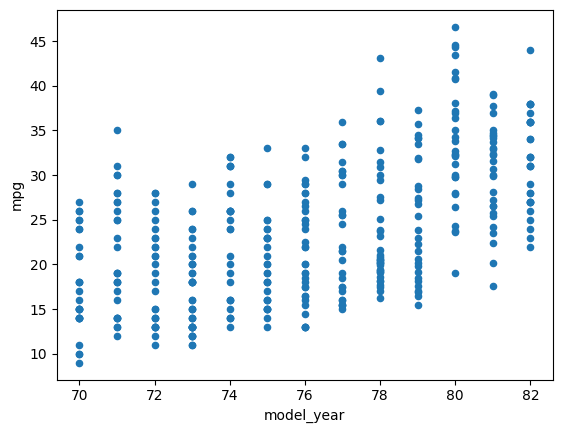

In [ ]:
pandasdf.plot(kind = 'scatter', x = 'model_year', y = 'mpg')
plt.show()

<Axes: xlabel='cylinders', ylabel='horsepower'>

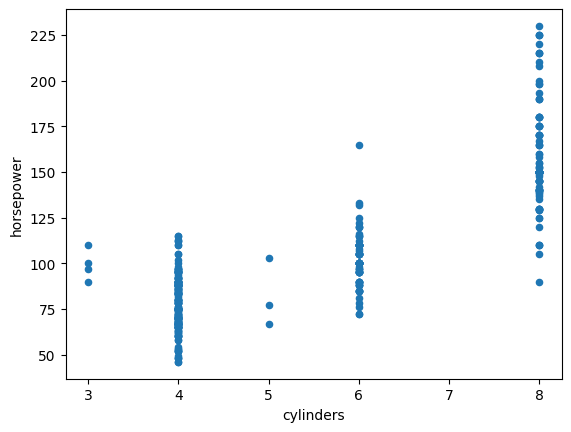

In [ ]:
df.plot(kind = 'scatter', x = 'cylinders', y = 'horsepower')
plt.show()

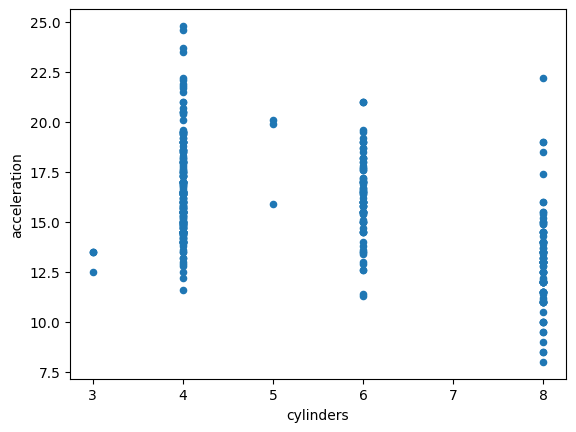

In [ ]:
df.plot(kind = 'scatter', x = 'cylinders', y = 'acceleration')
plt.show()

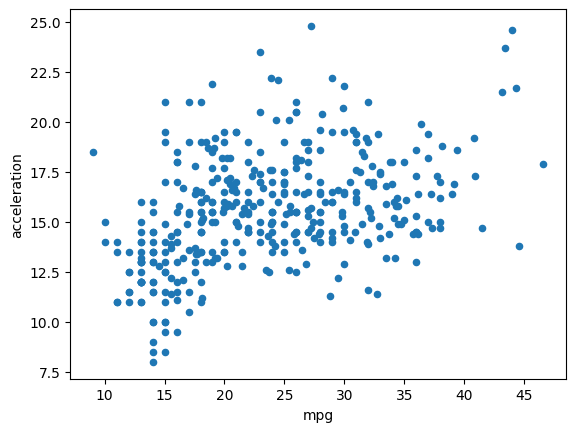

In [ ]:
df.plot(kind = 'scatter', x = 'mpg', y = 'acceleration')
plt.show()

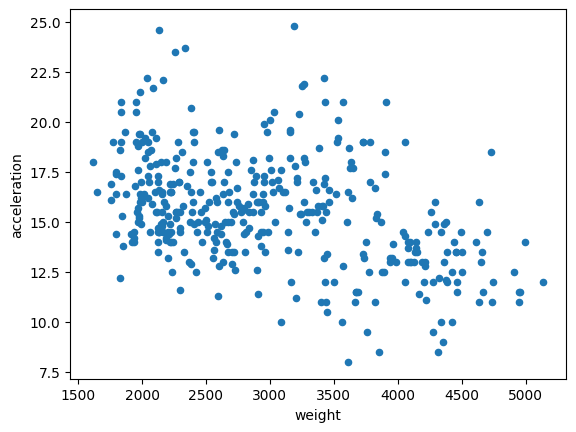

In [ ]:
df.plot(kind = 'scatter', x = 'weight', y = 'acceleration')
plt.show()

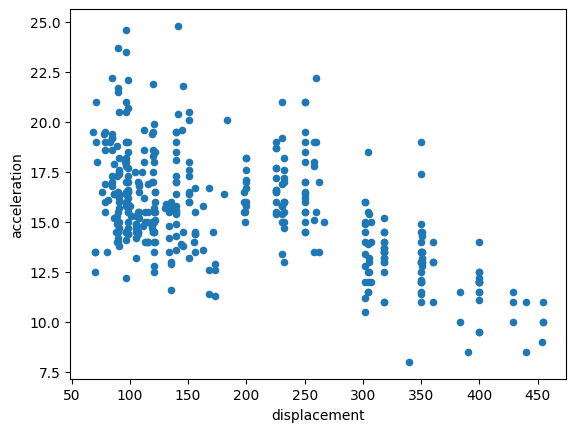

In [ ]:
df.plot(kind = 'scatter', x = 'displacement', y = 'acceleration')
plt.show()